In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
features=pd.read_csv(r"C:\Users\Abc\Downloads\Data Science\walmart-recruiting-store-sales-forecasting\features.csv")
stores=pd.read_csv(r"C:\Users\Abc\Downloads\Data Science\walmart-recruiting-store-sales-forecasting\stores.csv")
test=pd.read_csv(r"C:\Users\Abc\Downloads\Data Science\walmart-recruiting-store-sales-forecasting\test.csv")
train=pd.read_csv(r"C:\Users\Abc\Downloads\Data Science\walmart-recruiting-store-sales-forecasting\train.csv")
samplesubmission=pd.read_csv(r"C:\Users\Abc\Downloads\Data Science\walmart-recruiting-store-sales-forecasting\sampleSubmission.csv")

In [20]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [14]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [19]:
features.info

<bound method DataFrame.info of       Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0 

In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [20]:
stores.info

<bound method DataFrame.info of     Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41

In [19]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [16]:
test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [11]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [17]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [21]:
train.info

<bound method DataFrame.info of         Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]>

In [12]:
samplesubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [18]:
samplesubmission.dtypes

Id              object
Weekly_Sales     int64
dtype: object

In [3]:
dataset=train.merge(features, how="left").merge(stores, how="left")

In [4]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [8]:
dataset.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [37]:
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [5]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [5]:
features=['Store','Dept','Temperature','Fuel_Price','CPI','Unemployment','Type','Size']

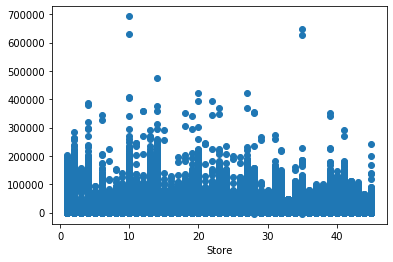

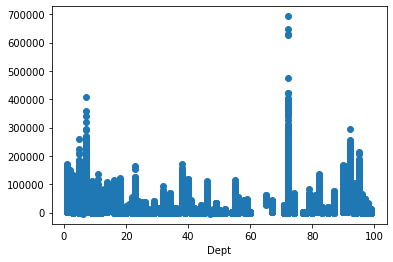

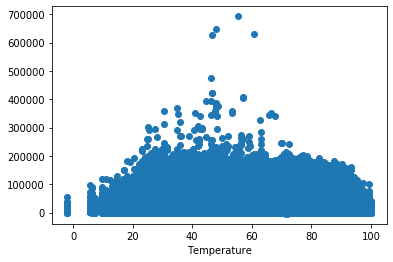

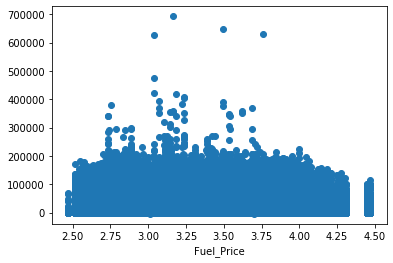

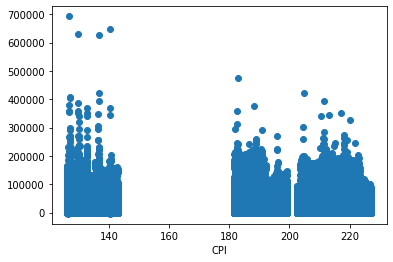

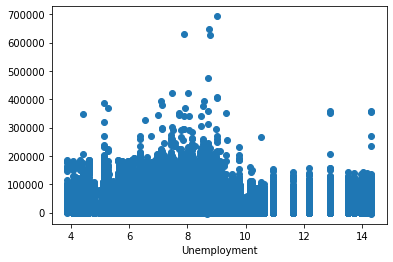

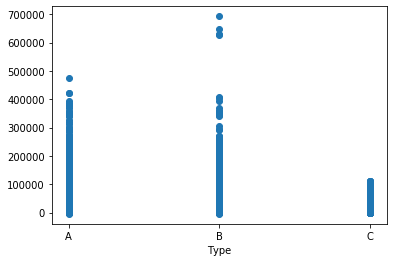

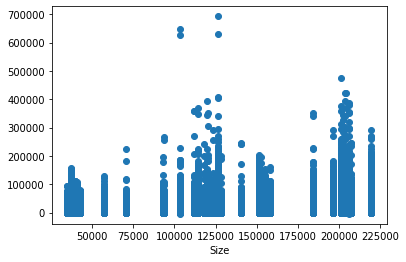

In [10]:
for feature in features:
    plt.scatter(dataset[feature], dataset['Weekly_Sales'])
    plt.xlabel(feature)
    plt.show()
    

In [9]:
features1=['Store','Dept','Type']

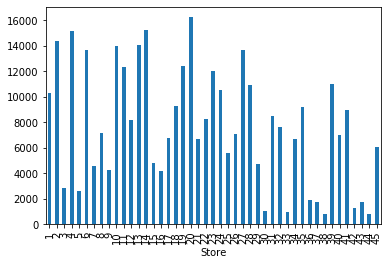

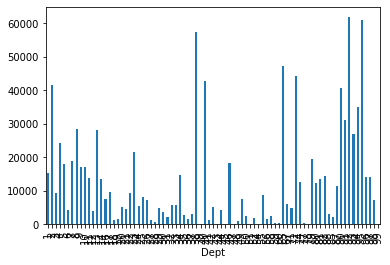

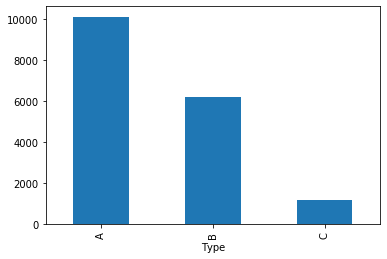

In [13]:
for feature in features1:
    dataset.groupby(feature)['Weekly_Sales'].median().plot.bar()Weekly_Sales
    plt.show()

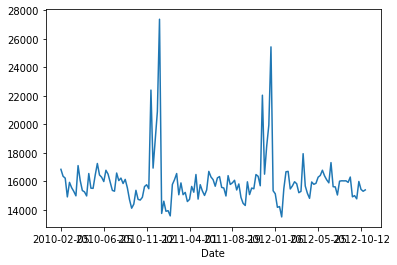

In [30]:
dataset['Weekly_Sales'].groupby(dataset['Date']).mean().plot()
plt.show()

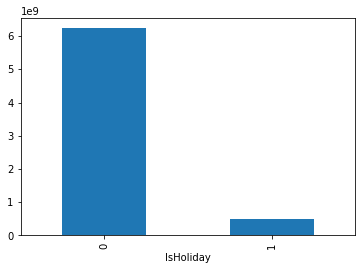

In [49]:
dataset.groupby('IsHoliday')['Weekly_Sales'].sum().plot.bar()
plt.show()

In [4]:
dataset['Month']=pd.to_datetime(dataset['Date']).dt.month
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,3


In [5]:
dataset['IsHoliday']=dataset['IsHoliday'].map({False:0, True:1})
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,3


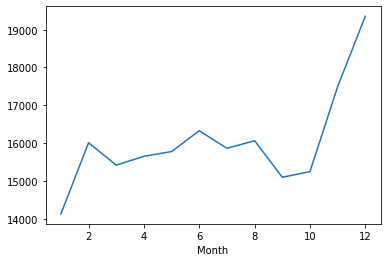

In [69]:
dataset.groupby('Month')['Weekly_Sales'].mean().plot()
plt.show()

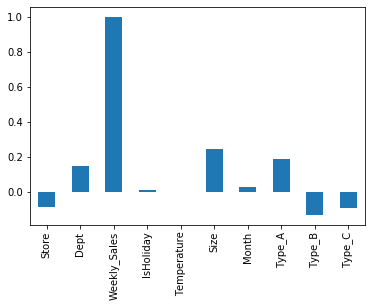

In [17]:
dataset.corr()['Weekly_Sales'].plot.bar()

In [6]:
dataset['MarkDown1']=dataset['MarkDown1'].fillna(0)
dataset['MarkDown2']=dataset['MarkDown1'].fillna(0)
dataset['MarkDown3']=dataset['MarkDown1'].fillna(0)
dataset['MarkDown4']=dataset['MarkDown1'].fillna(0)

In [7]:
dataset=pd.get_dummies(dataset, columns=['Type'])

In [8]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,NaN,211.096358,8.106,151315,2,1,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,NaN,211.242170,8.106,151315,2,1,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,NaN,211.289143,8.106,151315,2,1,0,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,NaN,211.319643,8.106,151315,2,1,0,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,NaN,211.350143,8.106,151315,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,4556.61,4556.61,4556.61,3288.25,192.013558,8.684,118221,9,0,1,0
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,5046.74,5046.74,5046.74,2340.01,192.170412,8.667,118221,10,0,1,0
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,1956.28,1956.28,1956.28,3990.54,192.327265,8.667,118221,10,0,1,0
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,2004.02,2004.02,2004.02,1537.49,192.330854,8.667,118221,10,0,1,0


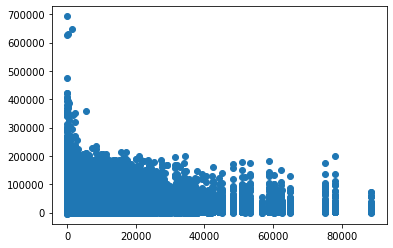

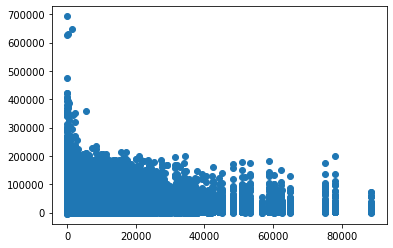

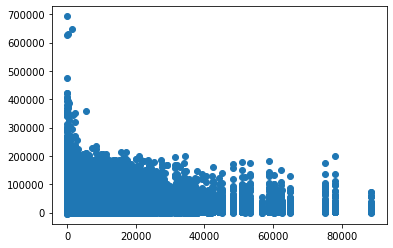

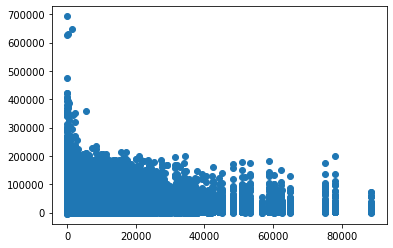

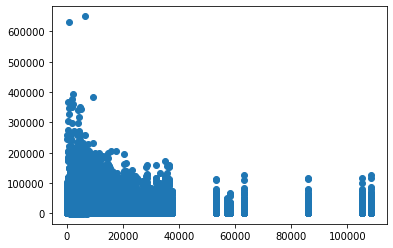

In [93]:
for m in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    plt.scatter(dataset[m],dataset['Weekly_Sales'])
    plt.show()

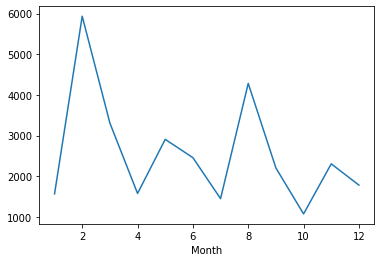

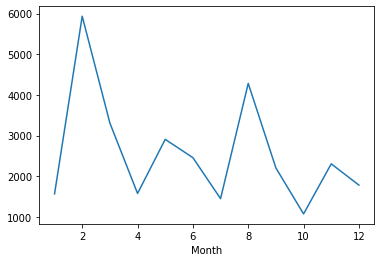

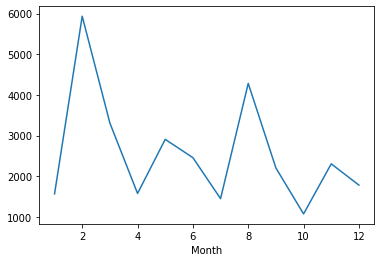

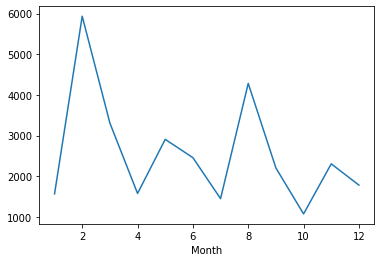

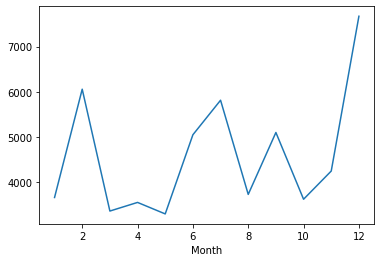

In [12]:
for m in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    dataset.groupby('Month')[m].mean().plot()
    plt.show()

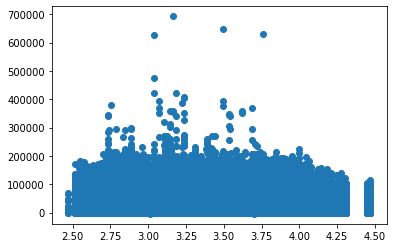

In [10]:
plt.scatter(dataset['Fuel_Price'],dataset['Weekly_Sales'])
plt.show()

In [8]:
dataset=dataset.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Fuel_Price','Date','CPI','Unemployment'])

In [9]:
dataset

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Size,Month,Type_A,Type_B,Type_C
0,1,1,24924.50,0,42.31,151315,2,1,0,0
1,1,1,46039.49,1,38.51,151315,2,1,0,0
2,1,1,41595.55,0,39.93,151315,2,1,0,0
3,1,1,19403.54,0,46.63,151315,2,1,0,0
4,1,1,21827.90,0,46.50,151315,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,118221,9,0,1,0
421566,45,98,628.10,0,64.89,118221,10,0,1,0
421567,45,98,1061.02,0,54.47,118221,10,0,1,0
421568,45,98,760.01,0,56.47,118221,10,0,1,0


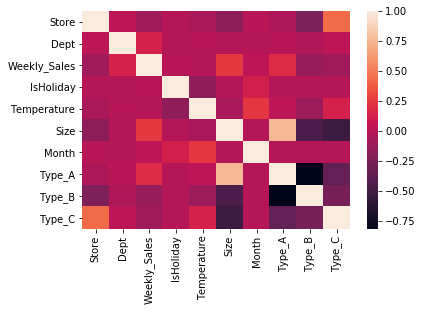

In [16]:
sns.heatmap(dataset.corr())

### Model Data

In [9]:
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Size,Month,Type_A,Type_B,Type_C
0,1,1,24924.50,0,42.31,151315,2,1,0,0
1,1,1,46039.49,1,38.51,151315,2,1,0,0
2,1,1,41595.55,0,39.93,151315,2,1,0,0
3,1,1,19403.54,0,46.63,151315,2,1,0,0
4,1,1,21827.90,0,46.50,151315,3,1,0,0


In [10]:
test_data=test.merge(features, how="left").merge(stores, how="left")

In [11]:
test_data

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221


In [12]:
test_data['MarkDown1']=test_data['MarkDown1'].fillna(0)
test_data['MarkDown2']=test_data['MarkDown1'].fillna(0)
test_data['MarkDown3']=test_data['MarkDown1'].fillna(0)
test_data['MarkDown4']=test_data['MarkDown1'].fillna(0)

test_data['IsHoliday']=test_data['IsHoliday'].map({False:0, True:1})
test_data.head()

test_data['Month']=pd.to_datetime(test_data['Date']).dt.month
test_data.head()

test_data=pd.get_dummies(test_data, columns=['Type'])

test_data=test_data.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Fuel_Price','Date','CPI','Unemployment'])

test_data

,Store,Dept,IsHoliday,Temperature,Size,Month,Type_A,Type_B,Type_C
0,1,1,0,55.32,151315,11,1,0,0
1,1,1,0,61.24,151315,11,1,0,0
2,1,1,0,52.92,151315,11,1,0,0
3,1,1,1,56.23,151315,11,1,0,0
4,1,1,0,52.34,151315,11,1,0,0
...,...,...,...,...,...,...,...,...,...
115059,45,98,0,76.05,118221,6,0,1,0
115060,45,98,0,77.50,118221,7,0,1,0
115061,45,98,0,79.37,118221,7,0,1,0
115062,45,98,0,82.84,118221,7,0,1,0


In [13]:
train_X=dataset.drop(['Weekly_Sales'], axis=1)

In [34]:
train_X

,Store,Dept,IsHoliday,Temperature,Size,Month,Type_A,Type_B,Type_C
0,1,1,0,42.31,151315,2,1,0,0
1,1,1,1,38.51,151315,2,1,0,0
2,1,1,0,39.93,151315,2,1,0,0
3,1,1,0,46.63,151315,2,1,0,0
4,1,1,0,46.50,151315,3,1,0,0
...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,118221,9,0,1,0
421566,45,98,0,64.89,118221,10,0,1,0
421567,45,98,0,54.47,118221,10,0,1,0
421568,45,98,0,56.47,118221,10,0,1,0


In [14]:
train_y=dataset['Weekly_Sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(train_X,train_y,test_size=.3,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred=lr.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

print(r2_score(y_test, y_pred))

14585.264112759198
473814221.42572826
21767.27409267702
0.08827507780532473


In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
pred_rfr=rfr.predict(X_test)

In [22]:
print(mean_absolute_error(y_test, pred_rfr))
print(mean_squared_error(y_test, pred_rfr))
print(np.sqrt(mean_squared_error(y_test, pred_rfr)))

print(r2_score(y_test, pred_rfr))

2064.7601781213534
27542032.26299098
5248.0503296930165
0.9470029473862155


In [23]:
rfr.score(X_test, y_test)

0.9470029473862155

In [24]:
n_estimators = [100,500,700,1000,1200]
max_features = ['auto', 'sqrt']
max_depth = [10,15,20,25,30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [25]:
random_params={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
random_rfr=RandomizedSearchCV(estimator=rfr, param_distributions=random_params,n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [28]:
random_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total= 5.7min
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.7min remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total= 5.5min
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total= 5.6min
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total= 5.8min
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total= 5.5min
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, total= 2.8min
[CV] n_estimators=100, min_samples_split=10, min_s

MemoryError: could not allocate 12582912 bytes